<a href="https://colab.research.google.com/github/ChanceDurr/MyUberEats/blob/master/seattlehourlywage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [0]:
# Import CSV
df = pd.read_csv('https://raw.githubusercontent.com/ChanceDurr/MyUberEats/master/City_of_Seattle_Wage_Data.csv',
                 names=['department', 'last_name', 'first_name', 'job_title', 'hourly_rate'],
                 header=0)

In [213]:
value_counts = df['department'].value_counts() # Entire DataFrame 
keep = value_counts[value_counts >= 10].index
keep

Index(['Police Department', 'Seattle City Light', 'Parks & Recreation',
       'Seattle Public Utilities', 'Fire Department',
       'Seattle Dept of Transportation', 'Information Technology',
       'Seattle Center', 'Finance & Admin Services',
       'Human Services Department', 'Construction & Inspections',
       'Legislative Department', 'Seattle Dept of Human Resource',
       'Education & Early Learning', 'Neighborhoods',
       'Planning & Comm Development', 'Arts & Culture', 'Office of Housing',
       'City Budget Office', 'Mayor's Office',
       'Office of Economic Development', 'Employees' Retirement System',
       'Office for Civil Rights', 'Sustainability & Environment',
       'Office of Labor Standards', 'Ethics & Elections Commission',
       'City Auditor', 'Intergovernment Relations'],
      dtype='object')

In [0]:
df = df[df['department'].isin(keep)]

In [215]:
# Create a series of hourly means for each department
hourly_mean = df.groupby('department')['hourly_rate'].mean()
hourly_mean = hourly_mean.sort_values(ascending=True)
hourly_mean

department
Parks & Recreation                25.516000
Seattle Center                    27.635516
Arts & Culture                    34.227000
Human Services Department         35.964157
Finance & Admin Services          39.600256
Office for Civil Rights           40.532219
Education & Early Learning        40.535101
Ethics & Elections Commission     40.577007
Neighborhoods                     40.971966
Office of Labor Standards         41.077680
Seattle Public Utilities          41.124927
Legislative Department            41.580341
Seattle Dept of Transportation    41.822010
Office of Housing                 43.667791
Fire Department                   44.714129
Construction & Inspections        44.851386
Office of Economic Development    44.875971
Seattle City Light                45.866894
Employees' Retirement System      47.691485
Sustainability & Environment      48.342400
Planning & Comm Development       48.525106
Seattle Dept of Human Resource    48.803258
Police Department    

In [216]:
# Create a series for highest paid positions by department
hourly_max = df.groupby(['department'])['hourly_rate'].max()
hourly_max = hourly_max.sort_values(ascending=True)
hourly_max

department
Arts & Culture                     68.0070
Neighborhoods                      70.4710
Intergovernment Relations          73.4700
Sustainability & Environment       75.2950
Office of Housing                  76.0930
City Auditor                       76.7089
Ethics & Elections Commission      78.2111
Office of Labor Standards          79.4090
Office for Civil Rights            80.9500
Human Services Department          81.4180
Education & Early Learning         83.2760
Planning & Comm Development        84.2680
Construction & Inspections         85.8700
Office of Economic Development     86.2069
Seattle Center                     87.9438
City Budget Office                 89.2130
Finance & Admin Services           90.0000
Legislative Department             90.0354
Seattle Dept of Human Resource     94.3690
Seattle Dept of Transportation     95.7854
Mayor's Office                     96.0500
Parks & Recreation                 97.7570
Fire Department                   110.8060


Text(147, 16.85, '$162.84')

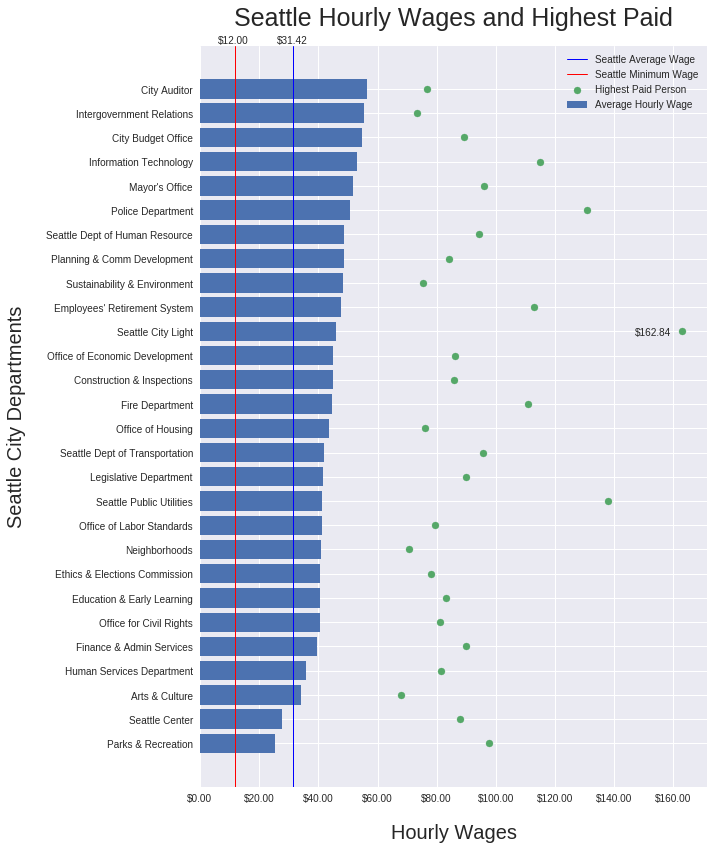

In [217]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(221)

# Add bar plot and scatter points
ax.barh(hourly_mean.index, hourly_mean.values)
ax.scatter(hourly_max, hourly_max.index)

# Set the x ticks to a 20 increment
ax.set_xticks([0, 20, 40, 60, 80, 100, 120, 140, 160])
ax.set_xticklabels(['${:.2f}'.format(x) for x in range(0, 180, 20)])
# Create the axis labels
ax.set_ylabel('Seattle City Departments', labelpad=20, fontsize=20)
ax.set_xlabel('Hourly Wages', labelpad=20, fontsize=20)

# Create the title
ax.set_title('Seattle Hourly Wages and Highest Paid', pad=20, fontsize=25)

# Add the Seattle Average wage line
ax.axvline(31.42, color='b', linewidth=1)

# Add the Seattle Min Wage line
ax.axvline(12, color='r', linewidth=1)

# Add legend
ax.legend(labels=['Seattle Average Wage', 'Seattle Minimum Wage', 'Highest Paid Person', 'Average Hourly Wage'])

# Add text to ax lines
ax.text(6, 28.9, s='$12.00')
ax.text(26, 28.9, s='$31.42')

# Add text to the highest paid person
ax.text(147, 16.85, s=(f'${hourly_max[-1].round(2)}'))

In [218]:
# Add a salary column
df['salary'] = df['hourly_rate'] * 2080

df.head()

,department,last_name,first_name,job_title,hourly_rate,salary
0,Construction & Inspections,Jenkins,Eric,Housing/Zoning Inspector Supv,46.13,95950.4
1,Construction & Inspections,McEachin,Shantel,Housing/Zoning Inspector,38.21,79476.8
2,Construction & Inspections,Lum,Gregory,Housing/Zoning Inspector,38.21,79476.8
3,Construction & Inspections,Patton,Valerie,Inspection Support Anlyst,41.89,87131.2
4,Police Department,Rivera,Martin,Pol Lieut,79.32,164985.6


In [219]:
# Create a salary adjusted for taking 1% of salary
df['salary_adjusted'] = df['salary'] - (df['salary'] * 0.01)

# Find the difference in the salaries
df['salary_difference'] = df['salary'] - df['salary_adjusted']

df.head()

,department,last_name,first_name,job_title,hourly_rate,salary,salary_adjusted,salary_difference
0,Construction & Inspections,Jenkins,Eric,Housing/Zoning Inspector Supv,46.13,95950.4,94990.896,959.504
1,Construction & Inspections,McEachin,Shantel,Housing/Zoning Inspector,38.21,79476.8,78682.032,794.768
2,Construction & Inspections,Lum,Gregory,Housing/Zoning Inspector,38.21,79476.8,78682.032,794.768
3,Construction & Inspections,Patton,Valerie,Inspection Support Anlyst,41.89,87131.2,86259.888,871.312
4,Police Department,Rivera,Martin,Pol Lieut,79.32,164985.6,163335.744,1649.856


In [220]:
df['salary_difference'].sum().round(2)

10679228.14

In [221]:
# Find the top 10 highest paid people

highest_paid_top10 = df.sort_values(by='hourly_rate', ascending=False).head(10)
highest_paid_top10

,department,last_name,first_name,job_title,hourly_rate,salary,salary_adjusted,salary_difference
4538,Seattle City Light,Smith,Deborah,City Light General Mgr&CEO,162.8353,338697.424,335310.44976,3386.97424
69,Seattle Public Utilities,Hara,Mami,SPU General Mgr&CEO,137.7880,286599.040,283733.04960,2865.99040
1614,Seattle City Light,Haynes,Michael,"Electric Util Exec 3,Ofcr",131.7087,273954.096,271214.55504,2739.54096
4188,Police Department,Best,Carmen,Seattle Police Chief,130.7480,271955.840,269236.28160,2719.55840
7077,Seattle City Light,Baggs,James,"Electric Util Exec 3,Ofcr",124.1570,258246.560,255664.09440,2582.46560
6913,Seattle City Light,Ziemianek,Bernard,"Electric Util Exec 3,Ofcr",117.3116,244008.128,241568.04672,2440.08128
10353,Information Technology,Bashir,Saad,Executive4,114.9430,239081.440,236690.62560,2390.81440
9710,Employees' Retirement System,Malinowski,Jason,Executive4,112.7580,234536.640,232191.27360,2345.36640
7523,Police Department,Garth Green,Marc,Executive4,110.9220,230717.760,228410.58240,2307.17760
6243,Fire Department,Scoggins,Harold,Executive4,110.8060,230476.480,228171.71520,2304.76480


In [222]:
df['department'].value_counts()

Police Department                 1953
Seattle City Light                1776
Parks & Recreation                1664
Seattle Public Utilities          1398
Fire Department                   1099
Seattle Dept of Transportation     988
Information Technology             689
Seattle Center                     671
Finance & Admin Services           560
Human Services Department          395
Construction & Inspections         373
Legislative Department             117
Seattle Dept of Human Resource     104
Education & Early Learning          79
Neighborhoods                       59
Planning & Comm Development         47
Arts & Culture                      46
Office of Housing                   43
City Budget Office                  39
Office of Economic Development      38
Mayor's Office                      38
Employees' Retirement System        33
Office for Civil Rights             32
Sustainability & Environment        30
Office of Labor Standards           25
Ethics & Elections Commis

In [223]:
df.describe()

,hourly_rate,salary,salary_adjusted,salary_difference
count,12332.000000,12332.000000,12332.000000,12332.000000
mean,41.633509,86597.698149,85731.721167,865.976981
std,15.168241,31549.940761,31234.441354,315.499408
min,16.000000,33280.000000,32947.200000,332.800000
25%,30.310000,63044.800000,62414.352000,630.448000
50%,41.260000,85820.800000,84962.592000,858.208000
75%,52.130000,108430.400000,107346.096000,1084.304000
max,162.835300,338697.424000,335310.449760,3386.974240


In [224]:
sal_sum = df['salary'].sum()
sal_dif_sum = df['salary_difference'].sum()
sal_sum, sal_dif_sum

(1067922813.5680001, 10679228.13568)

[Text(0, 0, '0'),
 Text(0, 0, '200M'),
 Text(0, 0, '400M'),
 Text(0, 0, '600M'),
 Text(0, 0, '800M'),
 Text(0, 0, '1B'),
 Text(0, 0, '1.2B')]

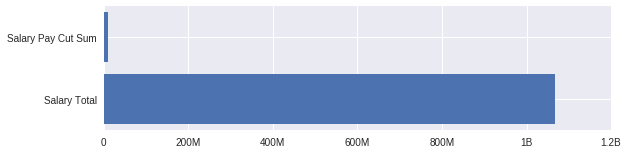

In [234]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(221)

# Add bar plot
ax.barh(['Salary Total', 'Salary Pay Cut Sum'], [sal_sum, sal_dif_sum]);
ax.set_xticks([0, 200000000, 400000000, 600000000, 800000000, 1000000000, 1200000000])
ax.set_xticklabels(['0', '200M', '400M', '600M', '800M', '1B', '1.2B'])